# 演習 (タイタニック号の乗客データ)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [14]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_data_sub1 = train_data.get(["Survived", "Pclass", "Sex", "Age"])
train_data_sub2 = train_data_sub1.dropna()
train_data_sub2.describe()

,Survived,Pclass,Age
count,555.000000,555.000000,555.000000
mean,0.405405,2.230631,30.041892
std,0.491413,0.839545,14.678331
min,0.000000,1.000000,0.750000
25%,0.000000,1.000000,21.000000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,39.000000
max,1.000000,3.000000,80.000000


In [16]:
dummy = pd.get_dummies(train_data_sub2[['Sex']])
dummy_female = dummy[['Sex_female']]
train_data = pd.concat([train_data_sub2.drop(['Sex'], axis=1), dummy_female], axis=1)
train_data.head()

,Survived,Pclass,Age,Sex_female
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0


In [17]:
dummy = pd.get_dummies(train_data_sub2[['Sex']])
dummy.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
test_data_sub = test_data.get(["Survived", "Pclass", "Sex", "Age"]).dropna()
test_data = pd.concat([test_data_sub.drop(['Sex'], axis=1), pd.get_dummies(test_data_sub[['Sex']])[['Sex_female']]], axis=1)
test_data.head()

,Survived,Pclass,Age,Sex_female
0,1,1,18.0,1
1,1,1,35.0,0
2,0,3,18.0,1
3,0,3,25.0,0
4,0,3,26.0,0


In [19]:
X_train = train_data.drop(["Survived"], axis=1) # 特徴量の列を取り出す
y_train = train_data.Survived # 正解ラベルの列を取り出す

log_reg = LogisticRegression(random_state=0, penalty='l2', C=1, solver='liblinear')
log_reg.fit(X_train, y_train) # 特徴量と正解データで学習

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
X_test = test_data.drop(["Survived"], axis=1)
y_test = test_data.Survived

print("training score : ", log_reg.score(X_test, y_test)) # テストデータで正解率を計算

training score :  0.8113207547169812


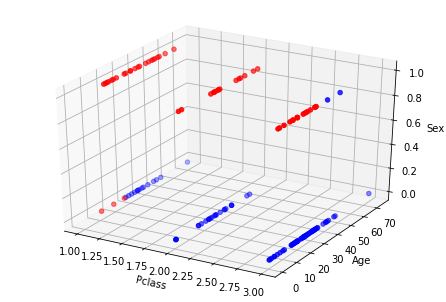

In [11]:
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("Pclass")
ax.set_ylabel("Age")
ax.set_zlabel("Sex")

y_pred = log_reg.predict(X_test)
ax.scatter(X_test.Pclass, X_test.Age, X_test.Sex_female, c=y_pred, cmap='bwr', marker="o", linestyle='None')
# 予測値のプロット(生存: 赤, 死亡: 青)

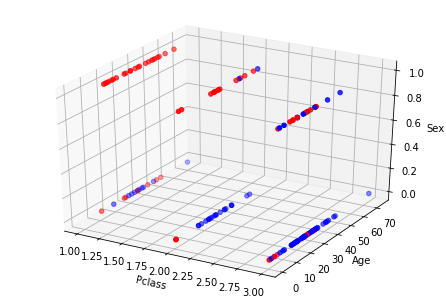

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("Pclass")
ax.set_ylabel("Age")
ax.set_zlabel("Sex")
ax.scatter(X_test.Pclass, X_test.Age, X_test.Sex_female, c=y_test, cmap='bwr', marker="o", linestyle='None')
# 正解のプロット(生存: 赤, 死亡: 青)